In [3]:
#importing libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
#loading dataset

In [64]:
data=pd.read_csv(r"C:\Users\JUSTIN\Downloads\TCS iON internship\salarydata.csv")

In [ ]:
#analysing the data

In [65]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [66]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [67]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
age               32561 non-null int64
workclass         32561 non-null object
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [69]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [70]:
data.shape

(32561, 14)

In [ ]:
#data cleaning

In [71]:
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [72]:
data.isin(['?']).sum(axis=0)

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [73]:
data=pd.DataFrame(data)

In [ ]:
#finding outliers

Text(0.5, 1.0, 'Box plot of education num')

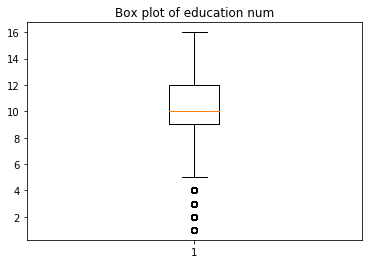

In [74]:
plt.boxplot(data['education-num'])
plt.title("Box plot of education num")

Text(0.5, 1.0, 'Box plot of age')

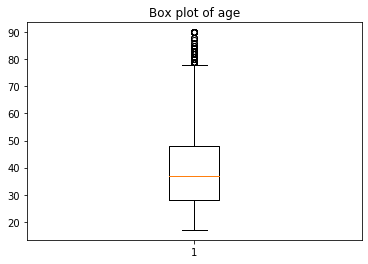

In [75]:
plt.boxplot(data['age'])
plt.title("Box plot of age")

In [76]:
q1=np.percentile(data['age'],25,interpolation='midpoint')
q2=np.percentile(data['age'],50,interpolation='midpoint')
q3=np.percentile(data['age'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

28.0
37.0
48.0


In [77]:
iqr=q3-q1
l_lim=q1-1.5*iqr
u_lim=q3+1.5*iqr
print(l_lim)
print(u_lim)

-2.0
78.0


In [78]:
outlier=[]
for x in data['age']:
 if((x>u_lim)or(x<l_lim)):
        outlier.append(x)
outlier

[79,
 90,
 80,
 81,
 90,
 88,
 90,
 90,
 80,
 90,
 81,
 82,
 79,
 81,
 80,
 83,
 90,
 90,
 79,
 81,
 90,
 90,
 80,
 90,
 90,
 79,
 79,
 84,
 90,
 80,
 90,
 81,
 83,
 84,
 81,
 79,
 85,
 82,
 79,
 80,
 90,
 90,
 90,
 84,
 80,
 90,
 90,
 79,
 84,
 90,
 79,
 90,
 90,
 90,
 82,
 81,
 90,
 84,
 79,
 81,
 82,
 81,
 80,
 90,
 80,
 84,
 82,
 79,
 90,
 84,
 90,
 83,
 79,
 81,
 80,
 79,
 80,
 79,
 80,
 90,
 90,
 80,
 90,
 90,
 81,
 83,
 82,
 90,
 90,
 81,
 80,
 80,
 90,
 79,
 80,
 82,
 85,
 80,
 79,
 90,
 81,
 79,
 80,
 79,
 81,
 82,
 88,
 90,
 82,
 88,
 84,
 83,
 79,
 86,
 90,
 90,
 82,
 83,
 81,
 79,
 90,
 80,
 81,
 79,
 84,
 84,
 79,
 90,
 80,
 81,
 81,
 81,
 90,
 87,
 90,
 80,
 80,
 82,
 90,
 90,
 85,
 82,
 81]

In [79]:
Ind1 = data['age']>u_lim
location=data.loc[Ind1].index

In [80]:
data.drop(location,inplace=True)

Text(0.5, 1.0, 'Box plot of age')

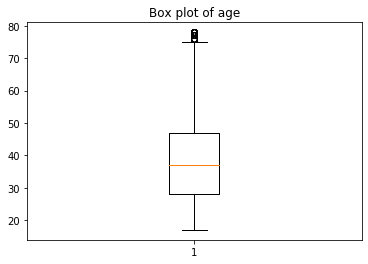

In [81]:
plt.boxplot(data['age'])
plt.title("Box plot of age")

Text(0.5, 1.0, 'Box plot of capital gain')

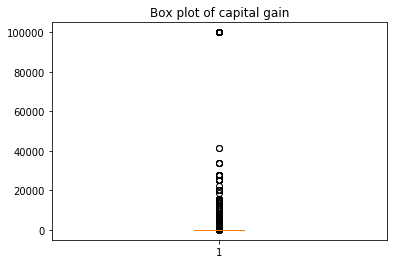

In [82]:
plt.boxplot(data['capital-gain'])
plt.title("Box plot of capital gain")

Text(0.5, 1.0, 'Box plot of capital loss')

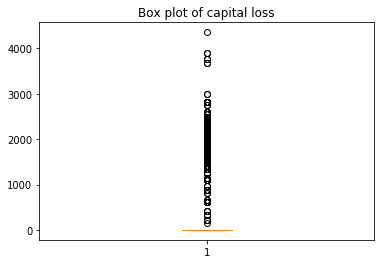

In [83]:
plt.boxplot(data['capital-loss'])
plt.title("Box plot of capital loss")

Text(0.5, 1.0, 'Box plot of hours per week')

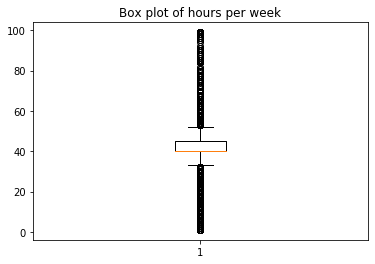

In [84]:
plt.boxplot(data['hours-per-week'])
plt.title("Box plot of hours per week")

In [85]:
q1=np.percentile(data['hours-per-week'],25,interpolation='midpoint')
q2=np.percentile(data['hours-per-week'],50,interpolation='midpoint')
q3=np.percentile(data['hours-per-week'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

40.0
40.0
45.0


In [86]:
iqr=q3-q1
l_lim=q1-1.5*iqr
u_lim=q3+1.5*iqr
print(l_lim)
print(u_lim)

32.5
52.5


In [87]:
outlier=[]
for x in data['hours-per-week']:
 if((x>u_lim)or(x<l_lim)):
        outlier.append(x)
outlier

[13,
 16,
 80,
 30,
 60,
 20,
 60,
 80,
 15,
 25,
 30,
 60,
 55,
 60,
 58,
 32,
 70,
 2,
 22,
 30,
 25,
 60,
 60,
 32,
 25,
 56,
 60,
 28,
 60,
 60,
 20,
 30,
 30,
 24,
 24,
 2,
 60,
 20,
 16,
 20,
 25,
 12,
 65,
 1,
 28,
 24,
 55,
 60,
 12,
 60,
 55,
 20,
 10,
 20,
 55,
 70,
 20,
 20,
 60,
 30,
 20,
 30,
 60,
 12,
 75,
 24,
 24,
 98,
 15,
 60,
 56,
 16,
 60,
 80,
 25,
 54,
 25,
 15,
 24,
 10,
 15,
 55,
 60,
 30,
 20,
 8,
 25,
 25,
 30,
 24,
 55,
 15,
 15,
 10,
 10,
 30,
 25,
 6,
 16,
 55,
 64,
 65,
 25,
 24,
 60,
 19,
 30,
 18,
 60,
 72,
 25,
 60,
 28,
 5,
 55,
 60,
 20,
 60,
 16,
 60,
 24,
 6,
 30,
 20,
 20,
 20,
 60,
 60,
 25,
 20,
 20,
 8,
 30,
 20,
 24,
 80,
 58,
 9,
 30,
 8,
 20,
 32,
 55,
 60,
 12,
 70,
 25,
 30,
 24,
 60,
 80,
 25,
 28,
 21,
 60,
 20,
 60,
 32,
 55,
 20,
 20,
 24,
 55,
 60,
 64,
 26,
 60,
 60,
 14,
 60,
 60,
 55,
 15,
 20,
 32,
 15,
 60,
 25,
 20,
 10,
 16,
 5,
 4,
 55,
 30,
 20,
 20,
 60,
 20,
 30,
 65,
 25,
 15,
 60,
 20,
 59,
 24,
 15,
 20,
 25,
 72,
 20,
 2

In [88]:
Ind1 = data['hours-per-week']<l_lim
location=data.loc[Ind1].index
data.drop(location,inplace=True)

In [89]:
Ind1 = data['hours-per-week']>u_lim
location=data.loc[Ind1].index
data.drop(location,inplace=True)

Text(0.5, 1.0, 'Box plot of hours-per-week')

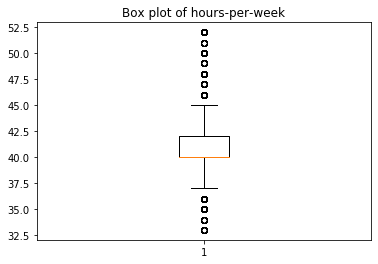

In [90]:
plt.boxplot(data['hours-per-week'])
plt.title("Box plot of hours-per-week")

In [ ]:
#replacing special character(?) values with nan

In [91]:
data['native-country'] = data['native-country'].replace('?',np.nan)
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)

In [ ]:
#droping nan rows

In [92]:
data.dropna(how='any',inplace=True)

In [93]:
#data.drop(['education-num','age', 'hours-per-week', 'capital-gain','capital-loss', 'native-country'], axis=1, inplace=True)

In [ ]:
#label encoding

In [94]:
#salary
data['salary'] = data['salary'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [95]:
data['salary']

0        0
2        0
3        0
4        0
5        0
        ..
32555    0
32556    0
32557    1
32558    0
32560    1
Name: salary, Length: 22163, dtype: int32

In [96]:
#sex
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1}).astype(int)

In [97]:
#race
data['race'] = data['race'].map({'Black': 0, 'Asian-Pac-Islander': 1,                     'Other': 2, 'White': 3, 'Amer-Indian-Eskimo': 4}).astype(int)

In [98]:
#marital-status
data['marital-status'] = data['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 'Married-civ-spouse': 2, 'Separated': 3, 
                                   'Divorced': 4,'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [99]:
#workclass
data['workclass'] = data['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1,'Federal-gov': 2, 'Without-pay': 3,
                                       'Local-gov': 4,'Private': 5, 'Self-emp-not-inc': 6}).astype(int)

In [100]:
#education
data['education'] = data['education'].map({'Some-college': 0, 'Preschool': 1, '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, 
                                       '12th': 5, '7th-8th': 6, 'Prof-school': 7,'1st-4th': 8, 'Assoc-acdm': 9, 
                                       'Doctorate': 10, '11th': 11,'Bachelors': 12, '10th': 13,'Assoc-voc': 14,
                                       '9th': 15}).astype(int)

In [101]:
#occupation
data['occupation'] = data['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 'Adm-clerical': 3, 'Handlers-cleaners': 4, 
 'Prof-specialty': 5,'Machine-op-inspct': 6, 'Exec-managerial': 7,'Priv-house-serv': 8,'Craft-repair': 9,'Sales': 10,
                                         'Transport-moving': 11, 'Armed-Forces': 12, 'Other-service': 13,
                                         'Protective-serv':14}).astype(int)

In [102]:
#relationship
data['relationship'] = data['relationship'].map({'Not-in-family': 0, 'Wife': 1, 'Other-relative': 2, 'Unmarried': 3,'Husband': 4,
                                             'Own-child': 5}).astype(int)

In [103]:
data.head()

,workclass,education,marital-status,occupation,relationship,race,sex,salary
0,1,12,5,3,0,3,0,0
2,5,3,4,4,0,3,0,0
3,5,11,2,4,4,0,0,0
4,5,12,2,5,1,0,1,0
5,5,4,2,7,1,3,1,0


In [ ]:
#data visualization

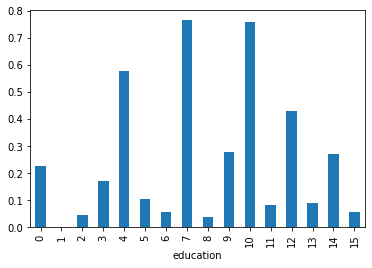

In [104]:
data.groupby('education').salary.mean().plot(kind='bar')

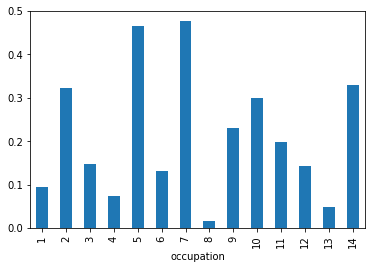

In [105]:
data.groupby('occupation').salary.mean().plot(kind='bar')

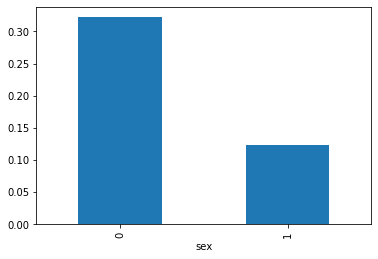

In [106]:
data.groupby('sex').salary.mean().plot(kind='bar')

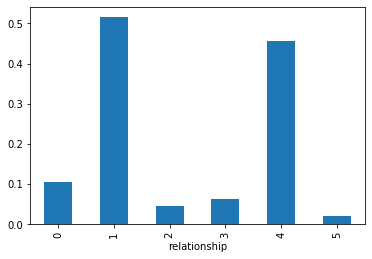

In [107]:
data.groupby('relationship').salary.mean().plot(kind='bar')

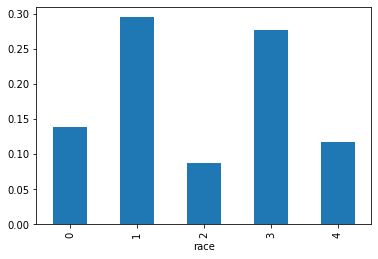

In [108]:
data.groupby('race').salary.mean().plot(kind='bar')

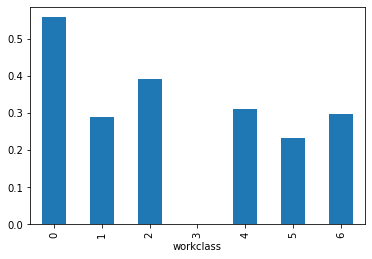

In [109]:
data.groupby('workclass').salary.mean().plot(kind='bar')

In [120]:
x = pd.DataFrame(np.c_[data['relationship'], data['education'], data['race'],data['occupation'],data['sex'],
                            data['marital-status'],data['workclass']], columns = ['relationship','education','race',
                            'occupation','sex','marital-status','workclass'])


In [121]:
y = pd.DataFrame(data.salary)

In [122]:
reg = LogisticRegression()

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=42)

# Model selection

# Logistic Regression

In [127]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

C:\Users\JUSTIN\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JUSTIN\Anaconda5\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [128]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7413180202351655
precision: 0.5448785638859557
recall: 0.26100151745068284
f1_score: 0.35294117647058826


# Decision tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [130]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7983319660924255
precision: 0.6494047619047619
recall: 0.5518462316641376
f1_score: 0.5966639321848509


# Random Forest

In [131]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)


C:\Users\JUSTIN\Anaconda5\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7983319660924255
precision: 0.6494047619047619
recall: 0.5518462316641376
f1_score: 0.5966639321848509


# Gradient Boosting

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

C:\Users\JUSTIN\Anaconda5\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [134]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8124145474432595
precision: 0.7119831814996496
recall: 0.5139099645928173
f1_score: 0.5969447708578143


# Standard Scaling

In [135]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

### Logistics Regression

In [136]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\JUSTIN\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\JUSTIN\Anaconda5\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [137]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7312004375170905
precision: 0.5071151358344114
recall: 0.19828022255943348
f1_score: 0.28509090909090906


### KNN

In [138]:
classifier=KNeighborsClassifier(n_neighbors=75, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

C:\Users\JUSTIN\Anaconda5\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [139]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7842493847415914
precision: 0.6415897799858056
recall: 0.45725847243297923
f1_score: 0.5339633786178382


### Decision Tree

In [140]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [141]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7986054142739951
precision: 0.6503579952267303
recall: 0.5513404147698533
f1_score: 0.5967697782644401


### Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)

C:\Users\JUSTIN\Anaconda5\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [143]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7986054142739951
precision: 0.6503579952267303
recall: 0.5513404147698533
f1_score: 0.5967697782644401


### Gradient boosting

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

C:\Users\JUSTIN\Anaconda5\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [145]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8124145474432595
precision: 0.7119831814996496
recall: 0.5139099645928173
f1_score: 0.5969447708578143


# Min-Max Scaling

In [146]:
y=data['salary']
x=data.drop(['salary',],axis=1)

In [147]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [148]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x_train=min_max.fit_transform(x_train)
x_test=min_max.fit_transform(x_test)

NameError: name 'preprocessing' is not defined

### Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\JUSTIN\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [150]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7383261899390932
precision: 0.5361842105263158
recall: 0.2707641196013289
f1_score: 0.3598233995584989


### KNN

In [151]:
classifier=KNeighborsClassifier(n_neighbors=75, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

In [152]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7805098127678772
precision: 0.6296296296296297
recall: 0.4659468438538206
f1_score: 0.5355608591885441


### Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [154]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8030678998420934
precision: 0.6620959843290891
recall: 0.5614617940199336
f1_score: 0.6076404494382023


### Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)

In [156]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8030678998420934
precision: 0.6620959843290891
recall: 0.5614617940199336
f1_score: 0.6076404494382023


### Gradient Boosting

In [157]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [158]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8120911346717798
precision: 0.7174677608440797
recall: 0.5083056478405316
f1_score: 0.5950413223140496


# Normalization

In [159]:
y=data['salary']
x=data.drop(['salary',],axis=1)

In [160]:
x=preprocessing.normalize(x)

NameError: name 'preprocessing' is not defined

In [161]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

### Logistic Regression

In [162]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

C:\Users\JUSTIN\Anaconda5\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [163]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7383261899390932
precision: 0.5361842105263158
recall: 0.2707641196013289
f1_score: 0.3598233995584989


### KNN

In [164]:
classifier=KNeighborsClassifier(n_neighbors=75, metric='minkowski')
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)

In [165]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.7805098127678772
precision: 0.6296296296296297
recall: 0.4659468438538206
f1_score: 0.5355608591885441


### Decision tree

In [166]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [167]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8028423189713513
precision: 0.6620825147347741
recall: 0.5598006644518272
f1_score: 0.6066606660666067


### Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier
Classifier = RandomForestClassifier(n_estimators = 50)
Classifier.fit(x_train,y_train)
y_predict = Classifier.predict(x_test)

In [169]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8028423189713513
precision: 0.6620825147347741
recall: 0.5598006644518272
f1_score: 0.6066606660666067


### Gradient boosting

In [170]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [171]:
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8120911346717798
precision: 0.7174677608440797
recall: 0.5083056478405316
f1_score: 0.5950413223140496


# Selected model

# Gradient boosting

In [1]:
y=data['salary']
x=data.drop(['salary',],axis=1)

NameError: name 'data' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [2]:
#Hyper parameter tuning

In [77]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
parameters = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameters, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

In [ ]:
parameter2 = {'max_depth':[2,3,4,5,6,7] }
tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.01,n_estimators=1750, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = parameter2, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_, tuning.best_score_

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1750,max_depth=5, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10)
gb.fit(x_train,y_train)
y_pred = gb.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))

accuracy: 0.8597274960911324
precision: 0.7436743674367436
recall: 0.6311858076563959
f1_score: 0.6828282828282828


In [57]:
#feeding the predict function with our test values in the format 
[['relationship','education','race','occupation','gender','marital','workclass']]
reg.predict([[1,7,3,7,0,2,0]])

array([1])

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))